<a href="https://colab.research.google.com/github/zalfajhra/2025_VK_TI2C/blob/main/Jobsheet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


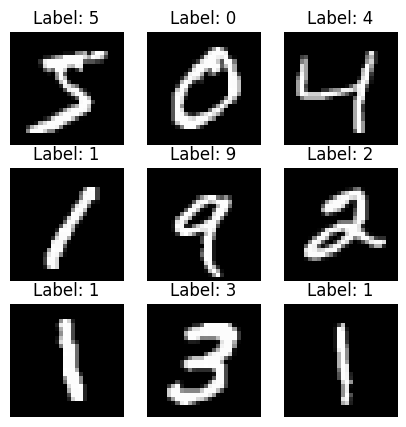

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

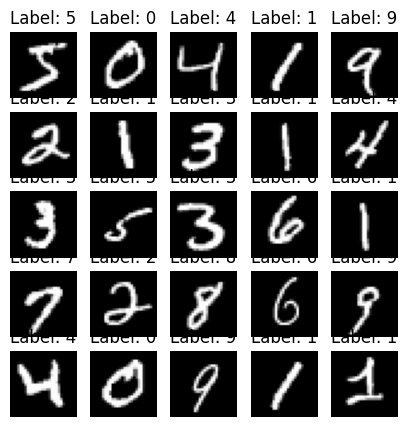

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Praktikum D3: Membangun CNN Dasar

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8910 - loss: 0.3684 - val_accuracy: 0.9835 - val_loss: 0.0624
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9820 - loss: 0.0598 - val_accuracy: 0.9852 - val_loss: 0.0546
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9880 - loss: 0.0408 - val_accuracy: 0.9843 - val_loss: 0.0551
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9883 - val_loss: 0.0481
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9868 - val_loss: 0.0477


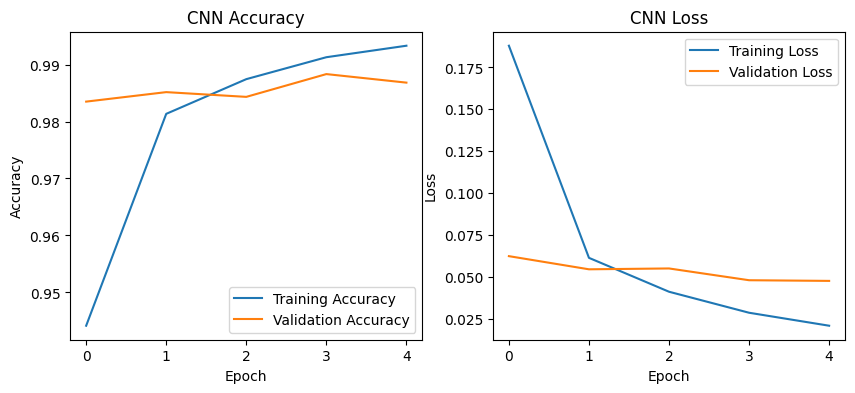

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()m

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8789 - loss: 0.3948 - val_accuracy: 0.9843 - val_loss: 0.0602
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9817 - loss: 0.0582 - val_accuracy: 0.9855 - val_loss: 0.0465
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9873 - loss: 0.0401 - val_accuracy: 0.9880 - val_loss: 0.0424
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9907 - loss: 0.0279 - val_accuracy: 0.9897 - val_loss: 0.0375
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9885 - val_loss: 0.0386


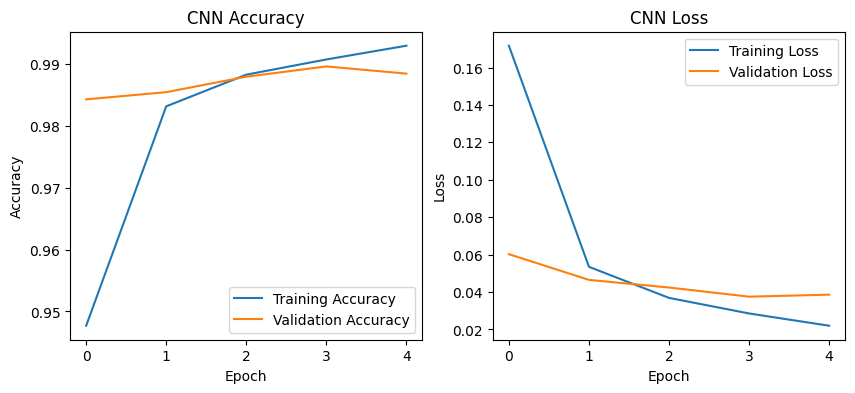

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D4: Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)


In [ ]:
keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'), layers.MaxPooling2D((2,2)), layers.Flatten(),
layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy') plt.plot(history.history['val_accuracy'], label='Validation Accuracy') plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch') plt.ylabel('Accuracy') plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss') plt.plot(history.history['val_loss'], label='Validation Loss') plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch') plt.ylabel('Loss') plt.legend()

plt.show()


# Praktikum 4: Eksperimen dengan Dataset Lebih Komplek(CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.3737 - loss: 1.7233 - val_accuracy: 0.5740 - val_loss: 1.1967
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5851 - loss: 1.1670 - val_accuracy: 0.6178 - val_loss: 1.0806
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6539 - loss: 0.9970 - val_accuracy: 0.6418 - val_loss: 1.0260
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6904 - loss: 0.8895 - val_accuracy: 0.6902 - val_loss: 0.9070
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7203 - loss: 0.8035 - val_accuracy: 0.6828 - val_loss: 0.9232
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7397 - loss: 0.7511 - val_accuracy: 0.6888 - val_loss: 0.9145
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7585 - loss: 0.7021 - val_accuracy: 0.6856 - val_loss: 0.9250
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7751 -

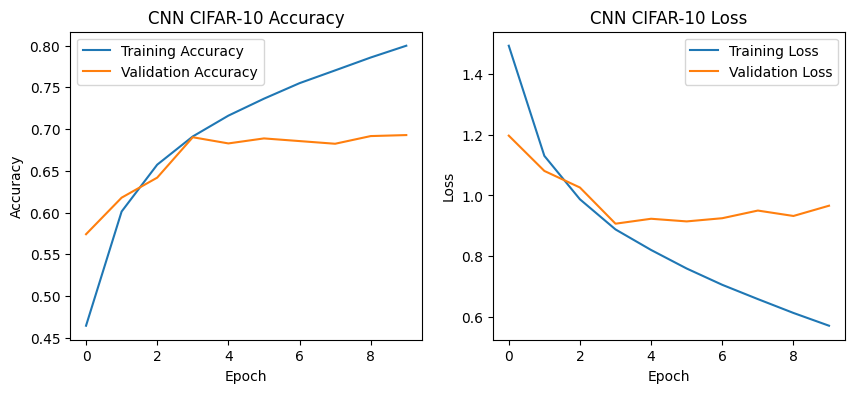

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 42ms/step - accuracy: 0.2676 - loss: 1.9532 - val_accuracy: 0.5056 - val_loss: 1.4064
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.4357 - loss: 1.5319 - val_accuracy: 0.5668 - val_loss: 1.2250
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.4970 - loss: 1.3910 - val_accuracy: 0.5760 - val_loss: 1.2203
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.5265 - loss: 1.3197 - val_accuracy: 0.6378 - val_loss: 1.0842
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.5570 - loss: 1.2412 - val_accuracy: 0.6442 - val_loss: 1.0103
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5771 - loss: 1.1794 - val_accuracy: 0.6542 - val_loss: 1.0013
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.5855 - loss: 1.1526 - val_accuracy: 0.6536 - val_loss: 1.0005
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.6068 -

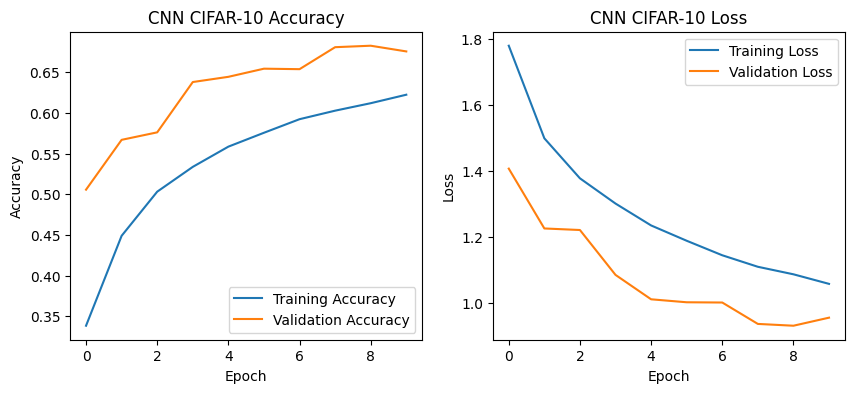

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5: Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 628s 445ms/step - accuracy: 0.4559 - loss: 1.5653 - val_accuracy: 0.5676 - val_loss: 1.2309
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 676s 441ms/step - accuracy: 0.5747 - loss: 1.2129 - val_accuracy: 0.5876 - val_loss: 1.1829
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 619s 439ms/step - accuracy: 0.5972 - loss: 1.1491 - val_accuracy: 0.6014 - val_loss: 1.1407
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 624s 440ms/step - accuracy: 0.6162 - loss: 1.1030 - val_accuracy: 0.6064 - val_loss: 1.1190
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 598s 423ms/step - accuracy: 0.6267 - loss: 1.0753 - val_accuracy: 0.6184 - val_loss: 1.0900


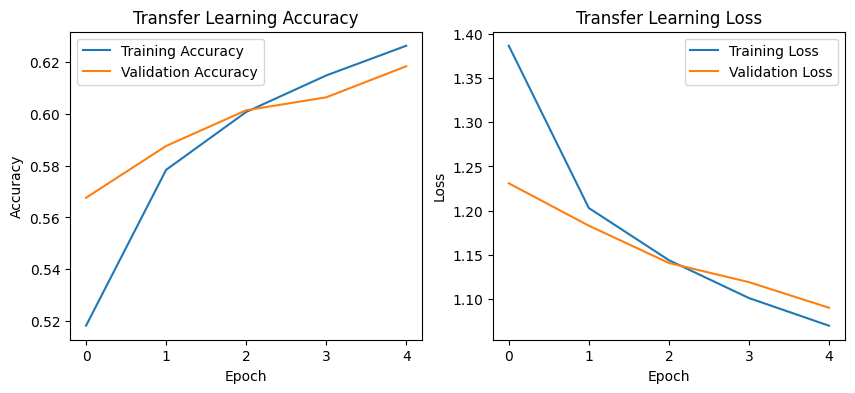

In [5]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

